#Credit Risk Analysis on Lending Dataset

>Vinayak Kumar Singh

#Data Exploration and Preprocessing:

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/lending_data.csv')

# Explore the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None


In [2]:
print(data.describe())

          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700.000000       6.825000     44800.000000        0.330357   
50%     9500.000000       7.172000     48100.000000        0.376299   
75%    10400.000000       7.528000     51400.000000        0.416342   
max    23800.000000      13.235000    105200.000000        0.714829   

       num_of_accounts  derogatory_marks    total_debt   loan_status  
count     77536.000000      77536.000000  77536.000000  77536.000000  
mean          3.826610          0.392308  19221.949804      0.032243  
std           1.904426          0.582086   8371.635077      0.176646  
min           0.000000          0.000000      0.000000      0.000000  
25%  

#Split the data into features (X) and target (y):

In [5]:
# Split the data into features (X) and target (y)
X = data.drop('loan_status', axis=1)
y = data['loan_status']

#Feature Engineering:

In [7]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Handling Imbalanced Data:

In [8]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#Model Training and Evaluation:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14983
           1       0.99      1.00      1.00     15032

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015

[[14902    81]
 [   65 14967]]


#Hyperparameter Tuning:

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Perform grid search cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(grid_search.best_params_)

# Evaluate the tuned model
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

{'C': 0.01, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14983
           1       0.99      1.00      1.00     15032

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015



#Model Comparison:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate the ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_lr = roc_auc_score(y_test, y_pred)

print(f"Random Forest ROC AUC: {roc_auc_rf:.3f}")
print(f"Logistic Regression ROC AUC: {roc_auc_lr:.3f}")

Random Forest ROC AUC: 0.996
Logistic Regression ROC AUC: 0.995


#Model Interpretability

In [12]:
from sklearn.inspection import permutation_importance

# Calculate feature importances
perm_importance = permutation_importance(lr, X_test, y_test)

# Sort the feature importances
sorted_idx = perm_importance.importances_mean.argsort()

# Print the feature importances
for i in sorted_idx:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.3f}")

borrower_income: 0.000
total_debt: 0.000
num_of_accounts: 0.001
interest_rate: 0.001
derogatory_marks: 0.002
loan_size: 0.227
debt_to_income: 0.386


#Histogram of Feature Distributions:

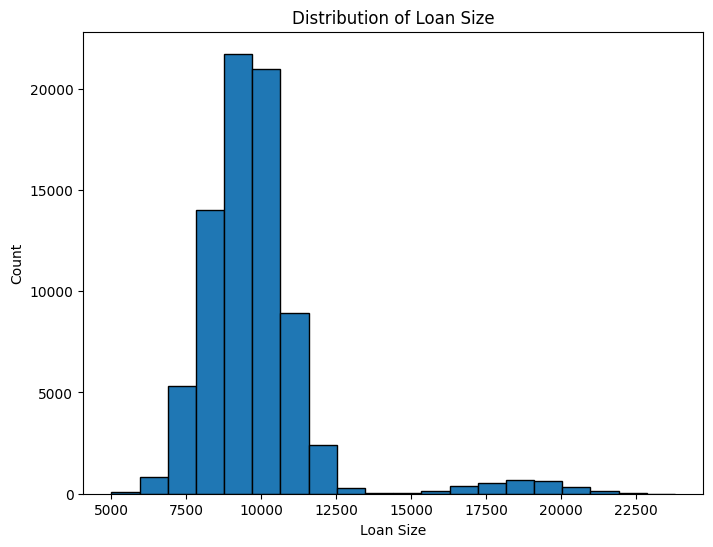

In [13]:
import matplotlib.pyplot as plt

# Plot histogram for a single feature
plt.figure(figsize=(8, 6))
plt.hist(data['loan_size'], bins=20, edgecolor='black')
plt.title('Distribution of Loan Size')
plt.xlabel('Loan Size')
plt.ylabel('Count')
plt.show()

#Scatter Plot to Visualize Feature Relationships:

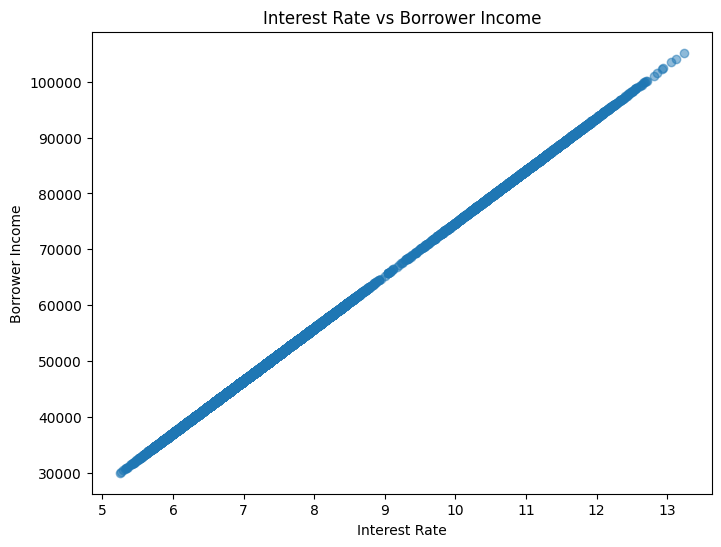

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(data['interest_rate'], data['borrower_income'], alpha=0.5)
plt.title('Interest Rate vs Borrower Income')
plt.xlabel('Interest Rate')
plt.ylabel('Borrower Income')
plt.show()

#Box Plot to Visualize Feature Distributions by Target Class:

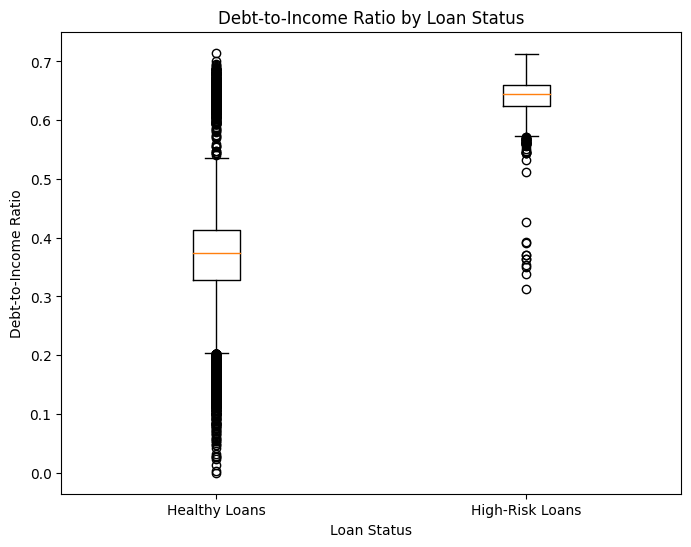

In [15]:
plt.figure(figsize=(8, 6))
plt.boxplot([data[data['loan_status'] == 0]['debt_to_income'],
             data[data['loan_status'] == 1]['debt_to_income']],
            labels=['Healthy Loans', 'High-Risk Loans'])
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

#Confusion Matrix Visualization:

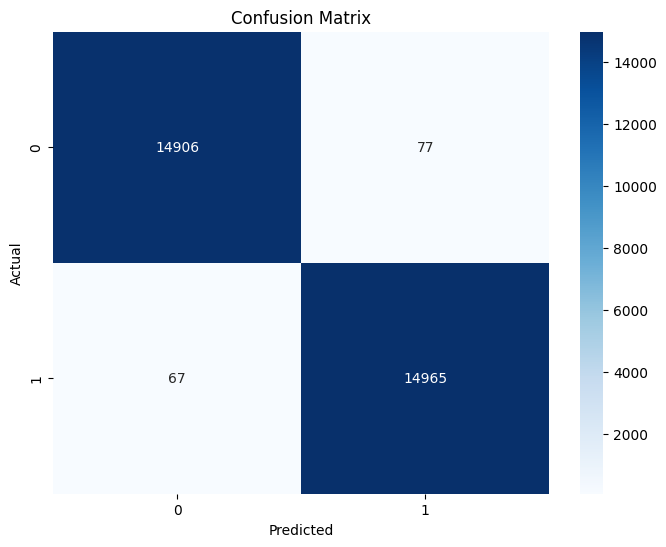

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#ROC Curve and AUC:

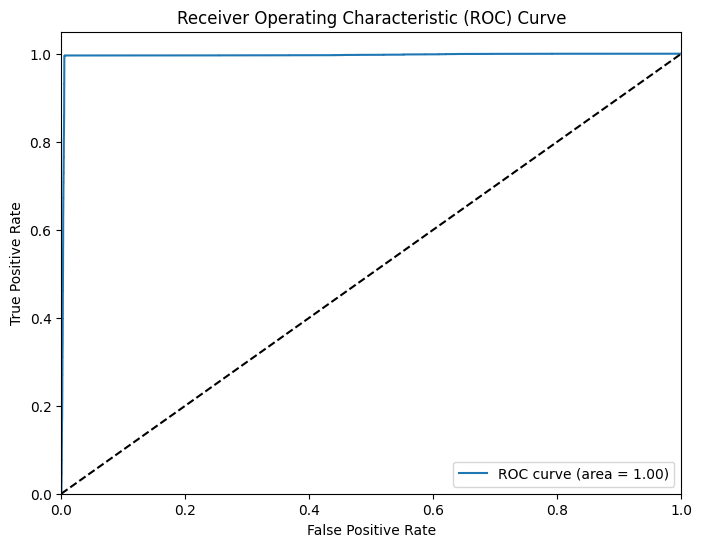

In [20]:
from sklearn.metrics import roc_curve, auc

# Compute the prediction probabilities
y_pred_proba = lr.predict_proba(X_test)

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Exploratory Data Analysis (EDA):

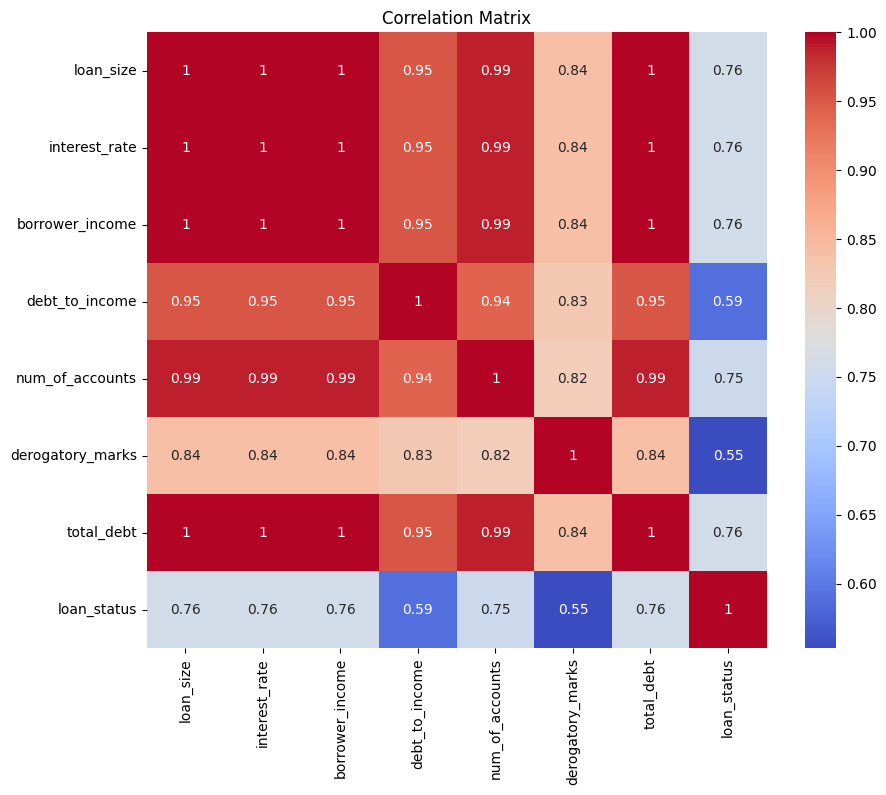

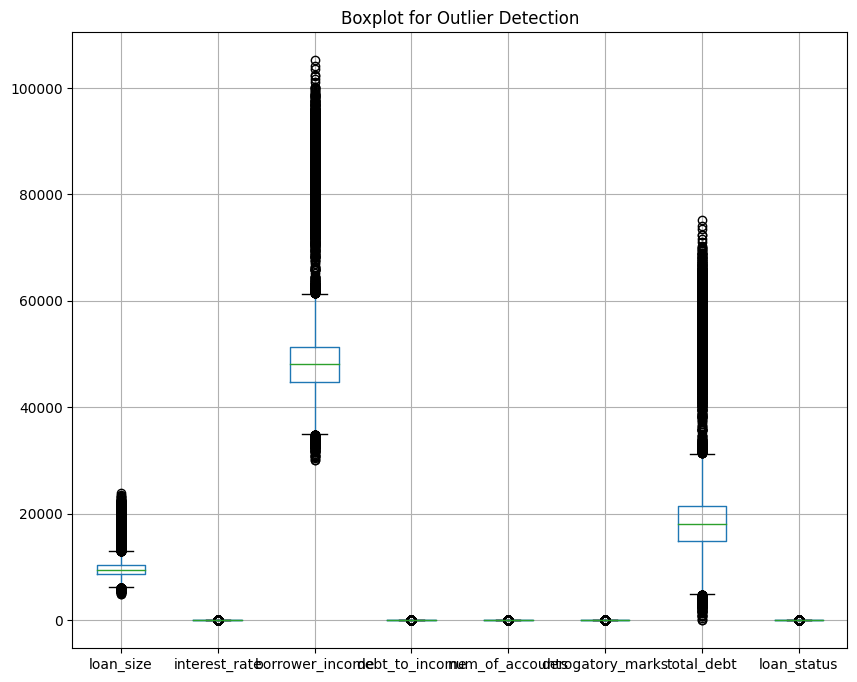

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Box plot for outlier detection
plt.figure(figsize=(10, 8))
data.boxplot()
plt.title('Boxplot for Outlier Detection')
plt.show()

#Feature Selection:

In [23]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mutual_info = mutual_info_classif(X, y)

# Sort features based on mutual information
feature_scores = pd.Series(mutual_info, index=X.columns)
feature_scores = feature_scores.sort_values(ascending=False)

# Select top k features
k = 5
top_features = feature_scores[:k].index.tolist()
X_selected = X[top_features]

#Ensemble Methods (XGBoost):

In [24]:
from xgboost import XGBClassifier

# Train XGBoost classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14983
           1       1.00      1.00      1.00     15032

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015



#Hyperparameter Tuning (XGBoost):

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform randomized search
random_search = RandomizedSearchCV(xgb, param_grid, cv=5, n_iter=10, scoring='f1', random_state=42)
random_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = random_search.best_params_

# Evaluate tuned XGBoost model
xgb_tuned = XGBClassifier(**best_params, random_state=42)
xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
print("\nTuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))


Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14983
           1       1.00      1.00      1.00     15032

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015



#Cross-Validation:

In [26]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for logistic regression
cv_scores = cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='f1')
print("\nLogistic Regression Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.3f}")


Logistic Regression Cross-Validation Scores:
[0.99537453 0.99503813 0.99417385 0.99470477 0.99400759]
Mean Cross-Validation Score: 0.995


#Final Outcome:

In [29]:
# Select the best-performing model (e.g., tuned XGBoost)
final_model = xgb_tuned

# Make predictions on test data
y_pred_final = final_model.predict(X_test)

# Print final classification report
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))


Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14983
           1       1.00      1.00      1.00     15032

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015

